In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob
import os

In [3]:
(train_images,train_labels),(_,_) = tf.keras.datasets.mnist.load_data()

In [26]:
train_images = train_images.reshape(train_images.shape[0],28,28,1).astype('float32')

In [27]:
train_images = (train_images - 127.5) / 127.5

In [28]:
BATCH_SIZE = 256
BUFFER_SIZE = 60000

In [29]:
datasets = tf.data.Dataset.from_tensor_slices(train_images)

In [30]:
datasets = datasets.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [19]:
def generator_model():
    model = keras.Sequential()
    model.add(layers.Dense(256,input_shape=(100,),use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(512,use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(28*28*1,use_bias=False,activation='tanh'))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Reshape((28,28,1)))
    
    return model

In [35]:
def discriminator_model():
    model = keras.Sequential()
    model.add(layers.Flatten())
    
    model.add(layers.Dense(512,use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(256,use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(1))
    
    return model

In [36]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [37]:
def discriminator_loss(real_out,fake_out):
    real_loss = cross_entropy(tf.ones_like(real_out),real_out)
    fake_loss = cross_entropy(tf.zeros_like(fake_out),fake_out)
    return real_loss + fake_loss

In [38]:
def generator_loss(fake_out):
    return cross_entropy(tf.ones_like(fake_out),fake_out)

In [39]:
generator_opt = tf.keras.optimizers.Adam(1e-4)
discriminator_opt = tf.keras.optimizers.Adam(1e-4)

In [40]:
EPOCHS = 100
noise_dim = 100
num_exp_to_generate = 16
seed = tf.random.normal([num_exp_to_generate,noise_dim])

In [41]:
generator = generator_model()
discriminator = discriminator_model()

In [42]:
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE,noise_dim])
    
    with tf.GradientTape() as gen_tape , tf.GradientTape() as disc_tape:
        real_out = discriminator(images,training=True)
        
        gen_image = generator(noise,training=True)
        fake_out = discriminator(gen_image,training=True)
        
        gen_loss = generator_loss(fake_out)
        disc_loss = discriminator_loss(real_out,fake_out)
        
    gradient_gen = gen_tape.gradient(gen_loss,generator.trainable_variables)
    gradient_disc = disc_tape.gradient(disc_loss,discriminator.trainable_variables)
    
    generator_opt.apply_gradients(zip(gradient_gen,generator.trainable_variables))
    discriminator_opt.apply_gradients(zip(gradient_disc,discriminator.trainable_variables))

In [46]:
def generate_plot_image(gen_model,test_noise):
    pre_images = gen_model(test_noise,training=False)
    fig = plt.figure(figsize=(4,4))
    for i in range(pre_images.shape[0]):
        plt.subplot(4,4,i+1)
        plt.imshow((pre_images[i,:,:,0]+1)/2,cmap='gray')
        plt.axis('off')
    plt.show()

In [47]:
def train(dataset,epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch)
            print('.',end='')
        generate_plot_image(generator,seed)

...........................................................................................................................................................................................................................................

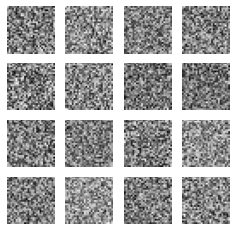

...........................................................................................................................................................................................................................................

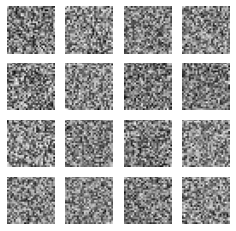

...........................................................................................................................................................................................................................................

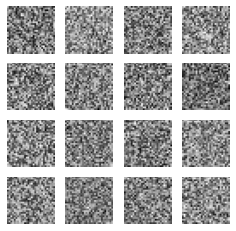

...........................................................................................................................................................................................................................................

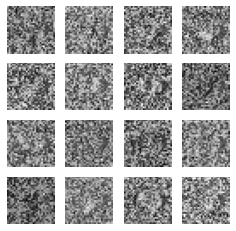

...........................................................................................................................................................................................................................................

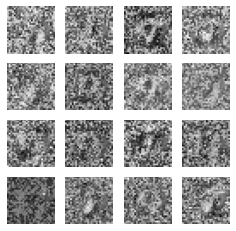

...........................................................................................................................................................................................................................................

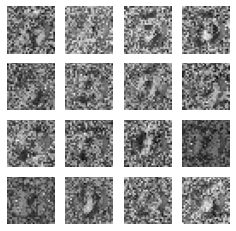

...........................................................................................................................................................................................................................................

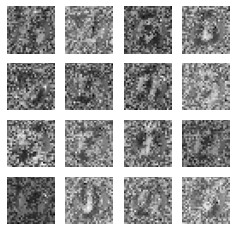

...........................................................................................................................................................................................................................................

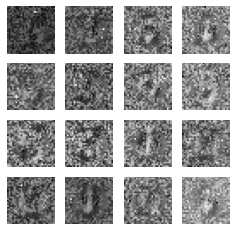

...........................................................................................................................................................................................................................................

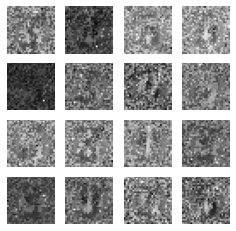

...........................................................................................................................................................................................................................................

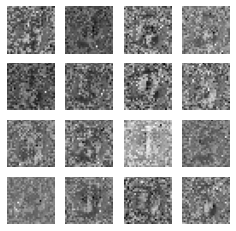

...........................................................................................................................................................................................................................................

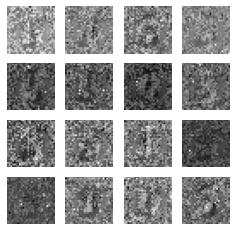

...........................................................................................................................................................................................................................................

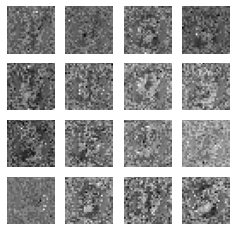

...........................................................................................................................................................................................................................................

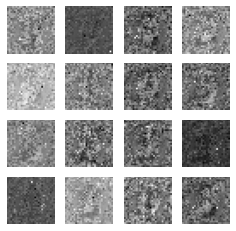

...........................................................................................................................................................................................................................................

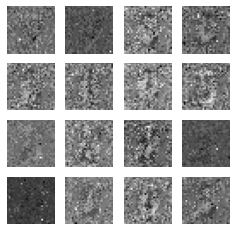

...........................................................................................................................................................................................................................................

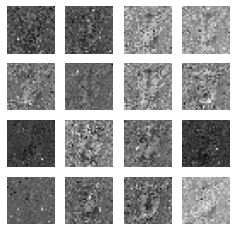

...........................................................................................................................................................................................................................................

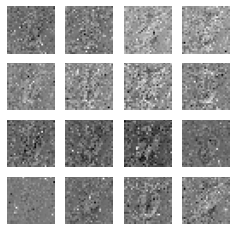

...........................................................................................................................................................................................................................................

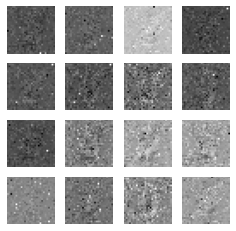

...........................................................................................................................................................................................................................................

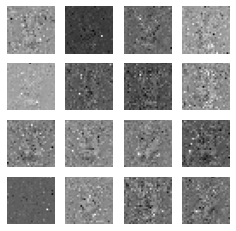

...........................................................................................................................................................................................................................................

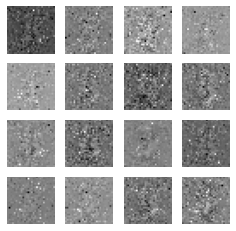

...........................................................................................................................................................................................................................................

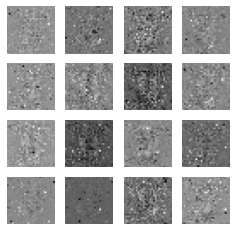

...........................................................................................................................................................................................................................................

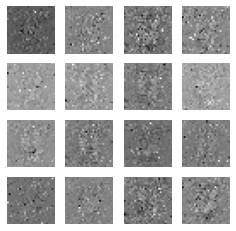

...........................................................................................................................................................................................................................................

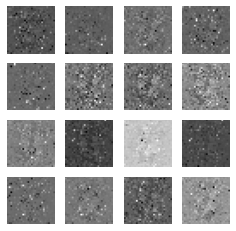

...........................................................................................................................................................................................................................................

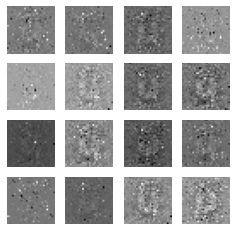

...........................................................................................................................................................................................................................................

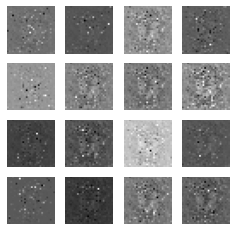

...........................................................................................................................................................................................................................................

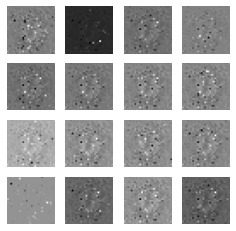

...........................................................................................................................................................................................................................................

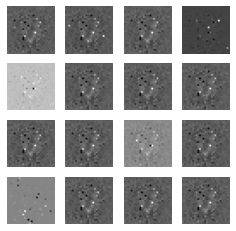

...........................................................................................................................................................................................................................................

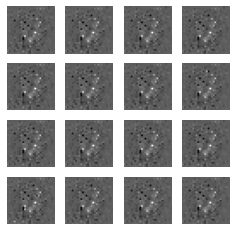

...........................................................................................................................................................................................................................................

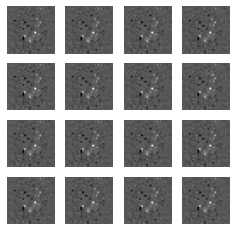

...........................................................................................................................................................................................................................................

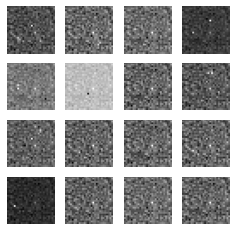

...........................................................................................................................................................................................................................................

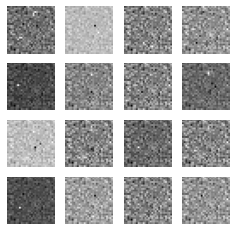

...........................................................................................................................................................................................................................................

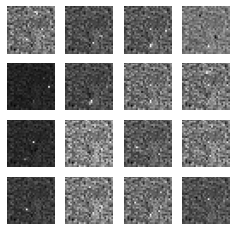

...........................................................................................................................................................................................................................................

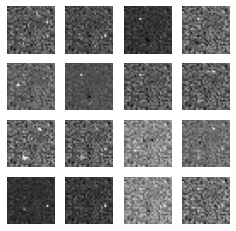

...........................................................................................................................................................................................................................................

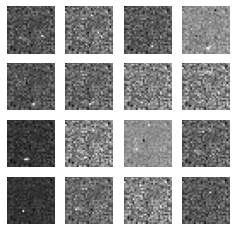

...........................................................................................................................................................................................................................................

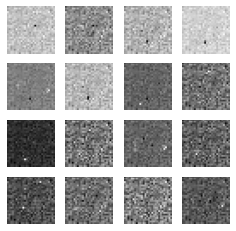

...........................................................................................................................................................................................................................................

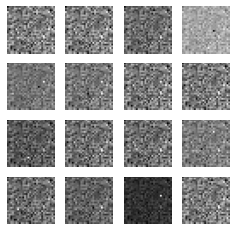

...........................................................................................................................................................................................................................................

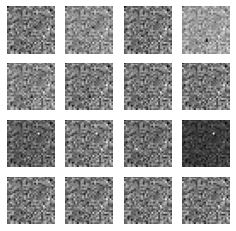

...........................................................................................................................................................................................................................................

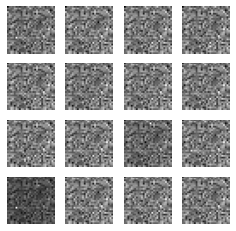

...........................................................................................................................................................................................................................................

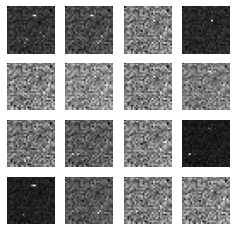

...........................................................................................................................................................................................................................................

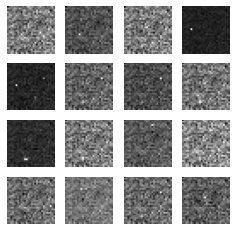

...........................................................................................................................................................................................................................................

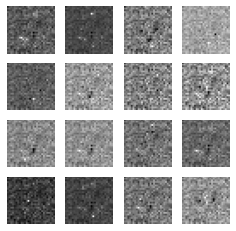

...........................................................................................................................................................................................................................................

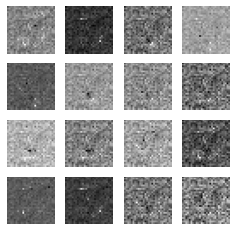

...........................................................................................................................................................................................................................................

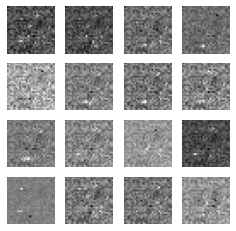

...........................................................................................................................................................................................................................................

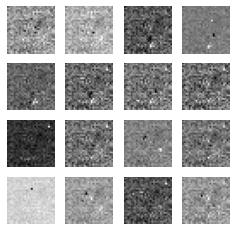

...........................................................................................................................................................................................................................................

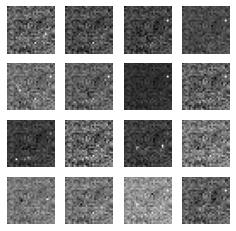

...........................................................................................................................................................................................................................................

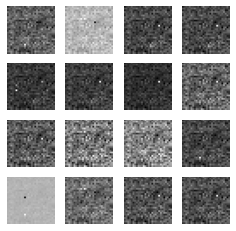

...........................................................................................................................................................................................................................................

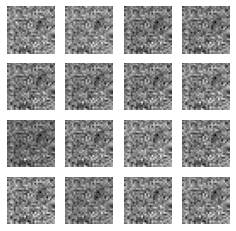

...........................................................................................................................................................................................................................................

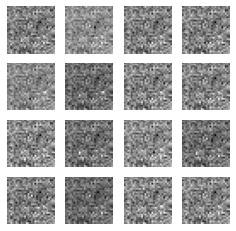

...........................................................................................................................................................................................................................................

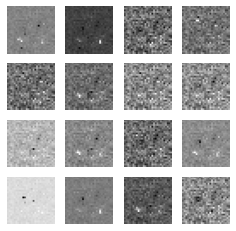

...........................................................................................................................................................................................................................................

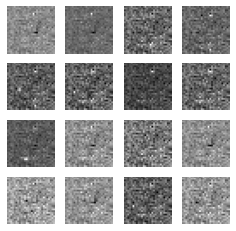

...........................................................................................................................................................................................................................................

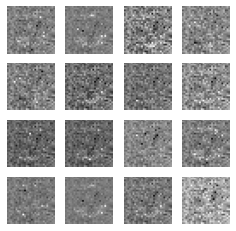

...........................................................................................................................................................................................................................................

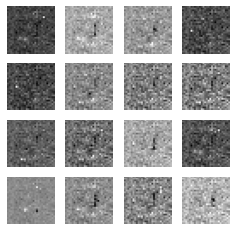

...........................................................................................................................................................................................................................................

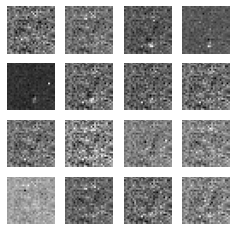

...........................................................................................................................................................................................................................................

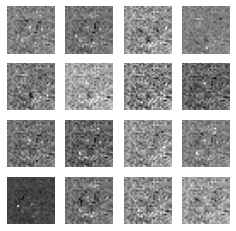

...........................................................................................................................................................................................................................................

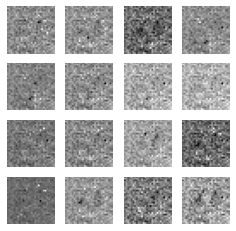

...........................................................................................................................................................................................................................................

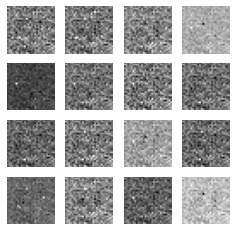

...........................................................................................................................................................................................................................................

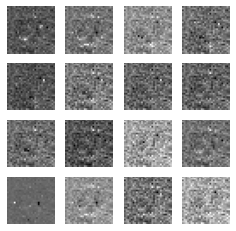

...........................................................................................................................................................................................................................................

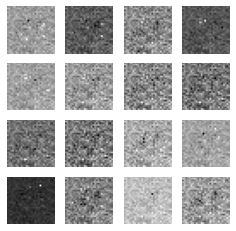

...........................................................................................................................................................................................................................................

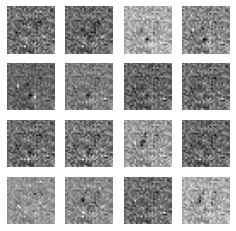

...........................................................................................................................................................................................................................................

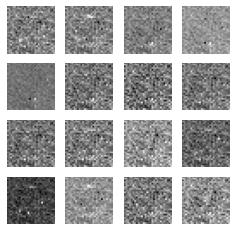

...........................................................................................................................................................................................................................................

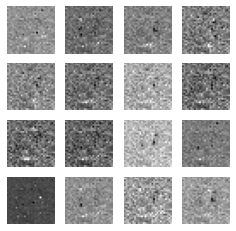

...........................................................................................................................................................................................................................................

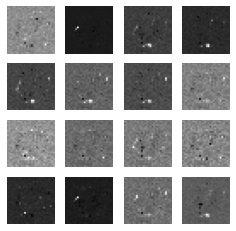

...........................................................................................................................................................................................................................................

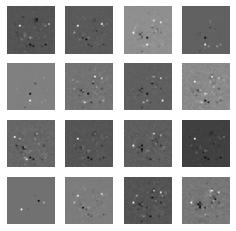

...........................................................................................................................................................................................................................................

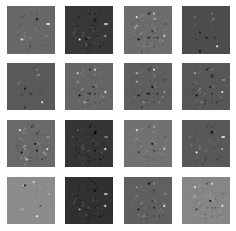

...........................................................................................................................................................................................................................................

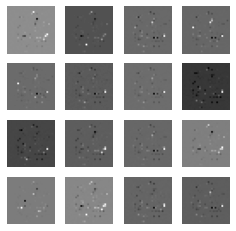

...........................................................................................................................................................................................................................................

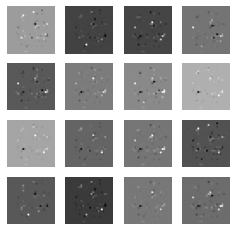

...........................................................................................................................................................................................................................................

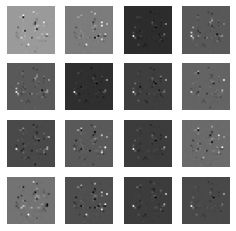

...........................................................................................................................................................................................................................................

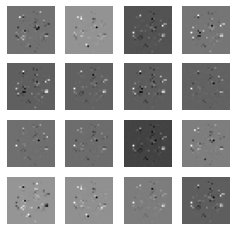

...........................................................................................................................................................................................................................................

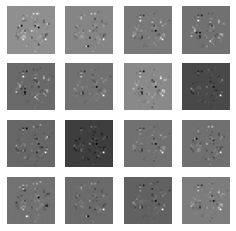

...........................................................................................................................................................................................................................................

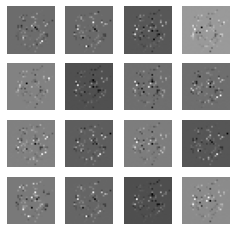

...........................................................................................................................................................................................................................................

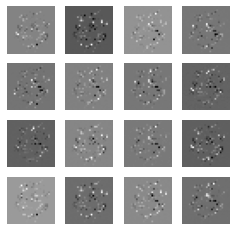

...........................................................................................................................................................................................................................................

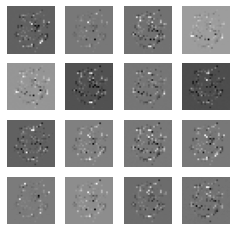

...........................................................................................................................................................................................................................................

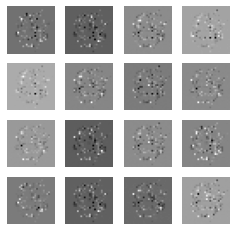

...........................................................................................................................................................................................................................................

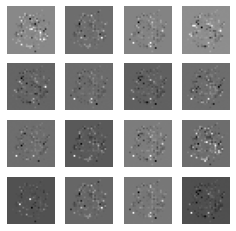

...........................................................................................................................................................................................................................................

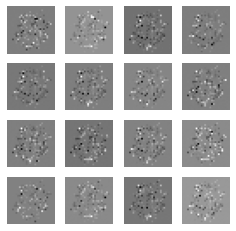

...........................................................................................................................................................................................................................................

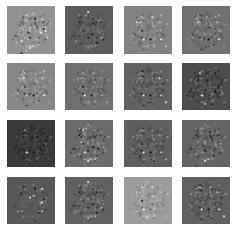

...........................................................................................................................................................................................................................................

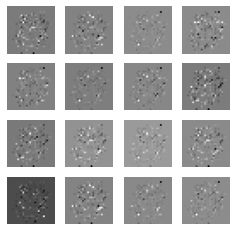

...........................................................................................................................................................................................................................................

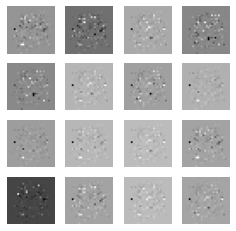

...........................................................................................................................................................................................................................................

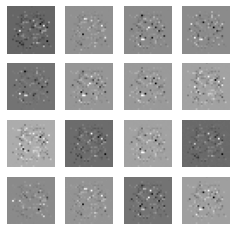

...........................................................................................................................................................................................................................................

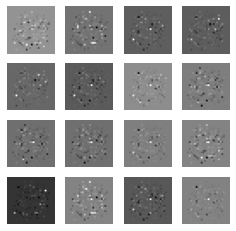

...........................................................................................................................................................................................................................................

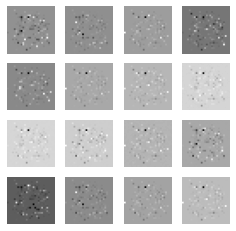

...........................................................................................................................................................................................................................................

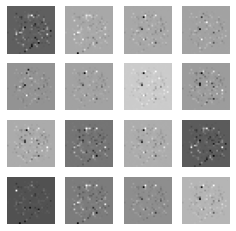

...........................................................................................................................................................................................................................................

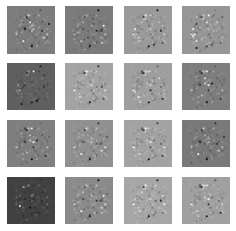

...........................................................................................................................................................................................................................................

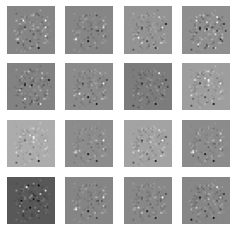

...........................................................................................................................................................................................................................................

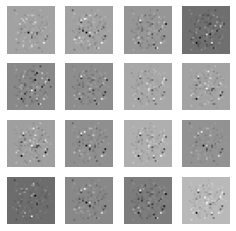

...........................................................................................................................................................................................................................................

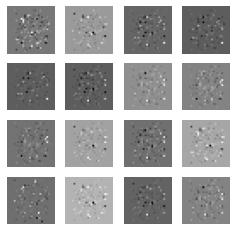

...........................................................................................................................................................................................................................................

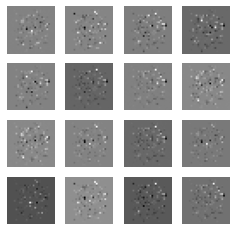

...........................................................................................................................................................................................................................................

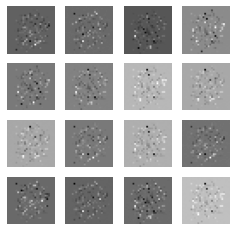

...........................................................................................................................................................................................................................................

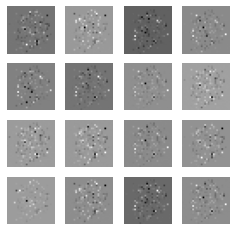

...........................................................................................................................................................................................................................................

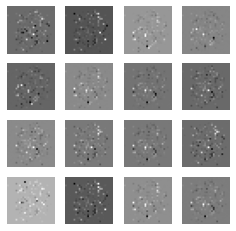

...........................................................................................................................................................................................................................................

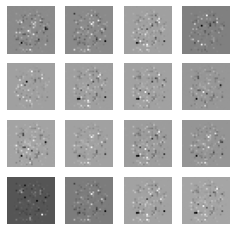

...........................................................................................................................................................................................................................................

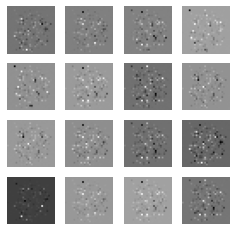

...........................................................................................................................................................................................................................................

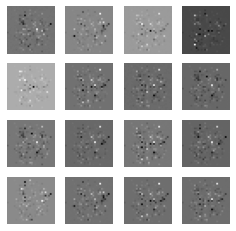

...........................................................................................................................................................................................................................................

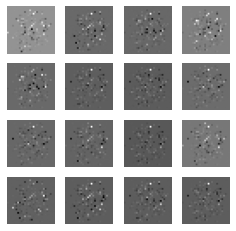

...........................................................................................................................................................................................................................................

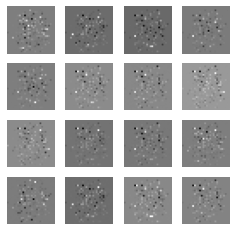

...........................................................................................................................................................................................................................................

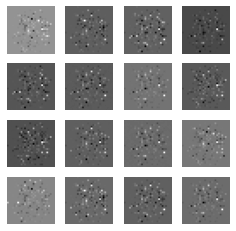

...........................................................................................................................................................................................................................................

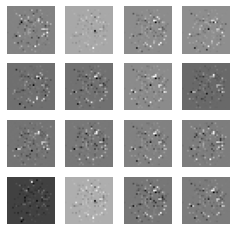

...........................................................................................................................................................................................................................................

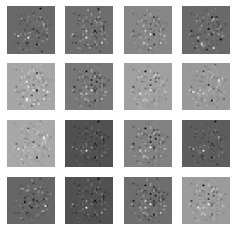

...........................................................................................................................................................................................................................................

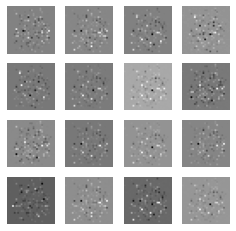

...........................................................................................................................................................................................................................................

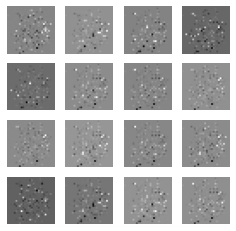

...........................................................................................................................................................................................................................................

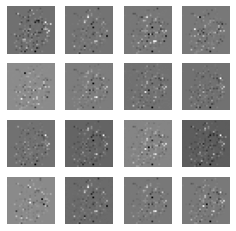

In [48]:
train(datasets,EPOCHS)